In [1]:
import os
import csv

import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from itertools import product
import joblib
import matplotlib.pyplot as plt

In [2]:
years = list(range(2014,2021))
apk_types = ['benign','malware']

In [3]:
# if not os.path.isdir('./csv'):
#     os.mkdir('./csv')
    
# train_ben_n = 39000
# train_mal_n = 10000

# for year in [2014,2015]:
#     df_ben = pd.read_csv(f'../nas/api/{apk_types[0]}_{year}.csv', index_col=0)
#     df_mal = pd.read_csv(f'../nas/api/{apk_types[1]}_{year}.csv', index_col=0)
    
#     df_ben = df_ben.sample(n=train_ben_n)
#     df_mal = df_mal.sample(n=train_mal_n)
    
#     df_ben.to_csv(f'./csv/{apk_types[0]}_{year}.csv')
#     df_mal.to_csv(f'./csv/{apk_types[1]}_{year}.csv')
    
#     print(year, 'done', train_ben_n, train_mal_n)

# for year in years[2:]:
#     df_ben = pd.read_csv(f'../nas/api/{apk_types[0]}_{year}.csv', index_col=0)
#     df_mal = pd.read_csv(f'../nas/api/{apk_types[1]}_{year}.csv', index_col=0)
    
#     min_ = min(df_ben.shape[0], df_mal.shape[0])
#     df_ben = df_ben.sample(n=min_)
#     df_mal = df_mal.sample(n=min_)
    
#     df_ben.to_csv(f'./csv/{apk_types[0]}_{year}.csv')
#     df_mal.to_csv(f'./csv/{apk_types[1]}_{year}.csv')
#     print(year, 'done', df_ben.shape[0], df_mal.shape[0])

In [4]:
file_list = os.listdir('./csv/')
file_list_ben = file_list[:len(file_list)//2]
file_list_mal = file_list[len(file_list)//2:]

ben_df_dict = dict()
mal_df_dict = dict()
for i, year in enumerate(years):
    ben_df_dict[year] = pd.read_csv(f'./csv/{file_list_ben[i]}', index_col=0)
    mal_df_dict[year] = pd.read_csv(f'./csv/{file_list_mal[i]}', index_col=0)
    ben_df_dict[year].drop(['year','month','day'], axis=1, inplace = True)
    mal_df_dict[year].drop(['year','month','day'], axis=1, inplace = True)

In [5]:
for year in years:
    print(ben_df_dict[year].shape, mal_df_dict[year].shape)

(9900, 1849) (9100, 1849)
(9900, 1849) (9100, 1849)
(9900, 1849) (9100, 1849)
(9900, 1849) (9100, 1849)
(9900, 1849) (9100, 1849)
(9900, 1849) (9100, 1849)
(9900, 1849) (9100, 1849)


In [6]:
train_ben_df_list = [ben_df.iloc[:-900,1:] for year, ben_df in sorted(ben_df_dict.items())]
train_mal_df_list = [mal_df.iloc[:-100,1:] for year, mal_df in sorted(mal_df_dict.items())]

In [7]:
train_label_per = ben_df_dict[year].iloc[:-900].shape[0]*[1] + mal_df_dict[year].iloc[:-100].shape[0]*[0]

In [13]:
import matplotlib.font_manager as fm
import matplotlib as mpl
fm.fontManager.addfont('/home/Times_New_Roman.ttf')

In [14]:
fm.fontManager.ttflist

[FontEntry(fname='/home/ghwns82/.local/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymReg.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable'),
 FontEntry(fname='/home/ghwns82/.local/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Bold.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=700, stretch='normal', size='scalable'),
 FontEntry(fname='/home/ghwns82/.local/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymBol.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable'),
 FontEntry(fname='/home/ghwns82/.local/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Oblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable'),
 FontEntry(fname='/home/ghwns82/.local/lib/python3.8/site-packages/matplotlib/mp

In [15]:
plt.rcParams['font.family']='Times New Roman'
mpl.rcParams['font.family'] = 'Times New Roman'
TimesNewRoman = fm.FontProperties(fname='/mnt/c/time/times.ttf')

In [16]:
font = {'family' : 'Times New Roman',
    'weight' : 'bold',
    'size'   : 12}
plt.rc('font', **font)

# 전체학습

In [8]:
train_df = pd.concat([*train_ben_df_list, *train_mal_df_list])

train_label=sum([ben_df.shape[0] for ben_df in train_ben_df_list]) *[1] + sum([mal_df.shape[0] for mal_df in train_mal_df_list])*[0]

In [9]:
train_df.shape

(126000, 1848)

In [17]:
model1=RandomForestClassifier(random_state=42).fit(train_df, train_label)

In [18]:
score_list1=[]
f1_list1=[]
confusion_list1=[]
for i, year in enumerate(years):
    ben_df = ben_df_dict[year].iloc[-900:,1:]
    mal_df = mal_df_dict[year].iloc[-100:,1:]
    test_df = pd.concat([ben_df, mal_df])
    test_label = len(ben_df)*[1]+ len(mal_df)*[0]
    score_list1.append(model1.score(test_df, test_label))
    y_pred = model1.predict(test_df)
    f1_list1.append(f1_score(test_label, y_pred))
    confusion_list1.append(confusion_matrix(test_label, y_pred))

In [19]:
def AUT(list_):
    return sum([(list_[i] + list_[i+1])/2 for i, elm in enumerate(list_[:-1])])/(len(list_)-1)  
def mean(list_):
    return sum(list_)/len(list_)  

In [20]:
AUT(score_list1), mean(score_list1)

(0.9775833333333334, 0.977)

In [21]:
AUT(f1_list1), mean(f1_list1)

(0.9873816893319404, 0.9870521414455092)

In [22]:
df=pd.DataFrame([list(map(str, years)), score_list1, f1_list1]).T
df.columns=['year','accuracy','f1 score']
df

,year,accuracy,f1 score
0,2014,0.974,0.985344
1,2015,0.985,0.991597
2,2016,0.985,0.991615
3,2017,0.993,0.996109
4,2018,0.962,0.978507
5,2019,0.967,0.981387
6,2020,0.973,0.984806


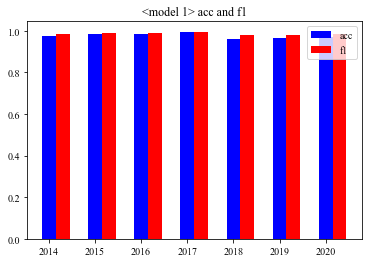

In [23]:
if not os.path.isdir('./visual'):
    os.mkdir('./visual')

x = np.arange(len(years))
plt.bar(x , score_list1, label="acc", width=0.3, color='b')
plt.bar(x+0.3 , f1_list1, label="f1", width=0.3, color='r')

# for i, year in enumerate(years[2:]):
    
    
plt.xticks(x, years)


plt.title('<model 1> acc and f1')
plt.legend()
plt.savefig(f"./visual/model1_acc_f1.png")
plt.show()

In [24]:
# plt.rc('font', size=28)

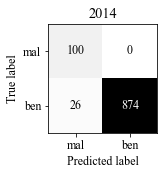

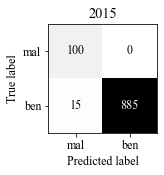

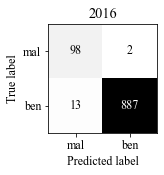

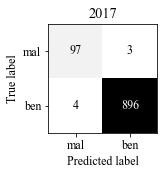

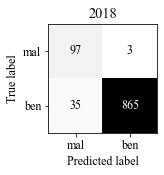

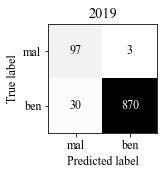

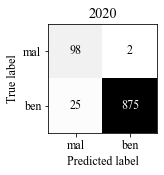

In [27]:
for i, cm in enumerate(confusion_list1):
    disp = ConfusionMatrixDisplay(cm, display_labels=['mal','ben'])
    fig,ax=plt.subplots(figsize=(2,2))
    disp.plot(cmap='Greys', colorbar=False, ax=ax)
    plt.title(f'{years[i]}')
    plt.savefig(f"./visual/model1_Confusion_matrix_{years[i]}.png" ,bbox_inches='tight', dpi=500)

# 일반 학습

In [28]:
model2=RandomForestClassifier(random_state=42)
for i in range(len(train_ben_df_list)):
    train_df_per = pd.concat([train_ben_df_list[i], train_mal_df_list[i]])
    model2.fit(train_df_per, train_label_per)

In [29]:
score_list2=[]
f1_list2=[]
confusion_list2=[]
for i, year in enumerate(years):
    ben_df = ben_df_dict[year].iloc[-900:,1:]
    mal_df = mal_df_dict[year].iloc[-100:,1:]
    test_df = pd.concat([ben_df, mal_df])
    test_label = len(ben_df)*[1]+ len(mal_df)*[0]
    score_list2.append(model2.score(test_df, test_label))
    y_pred = model2.predict(test_df)
    f1_list2.append(f1_score(test_label, y_pred))
    confusion_list2.append(confusion_matrix(test_label, y_pred))

In [30]:
df=pd.DataFrame([list(map(str, years)), score_list2, f1_list2]).T
df.columns=['year','accuracy','f1 score']
df

,year,accuracy,f1 score
0,2014,0.902,0.948258
1,2015,0.898,0.946089
2,2016,0.914,0.954109
3,2017,0.946,0.970874
4,2018,0.942,0.968026
5,2019,0.972,0.984615
6,2020,0.983,0.990497


In [31]:
AUT(score_list2), mean(score_list2)

(0.93575, 0.9367142857142856)

In [32]:
AUT(f1_list2), mean(f1_list2)

(0.9655151425097358, 0.9660669178928664)

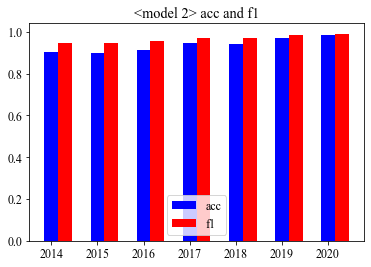

In [33]:
if not os.path.isdir('./visual'):
    os.mkdir('./visual')

x = np.arange(len(years))
plt.bar(x , score_list2, label="acc", width=0.3, color='b')
plt.bar(x+0.3 , f1_list2, label="f1", width=0.3, color='r')

# for i, year in enumerate(years[2:]):
    
    
plt.xticks(x, years)


plt.title('<model 2> acc and f1')
plt.legend()
plt.savefig(f"./visual/model2_acc_f1.png")
plt.show()

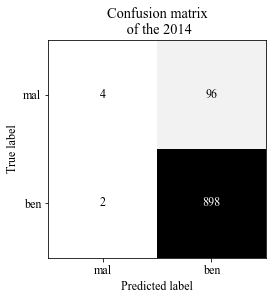

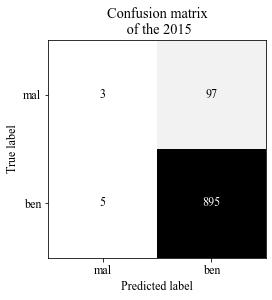

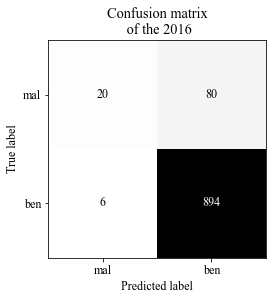

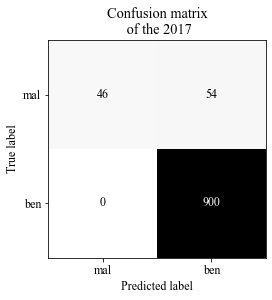

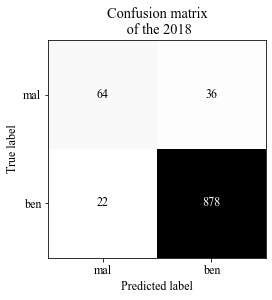

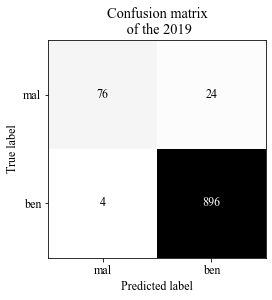

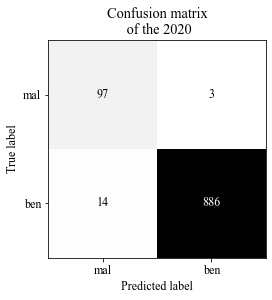

In [34]:
for i, cm in enumerate(confusion_list2):
    disp = ConfusionMatrixDisplay(cm, display_labels=['mal','ben'])
    disp.plot(cmap='Greys', colorbar=False)
    plt.title(f'Confusion matrix\n of the {years[i]}')
    plt.savefig(f"./visual/model2_Confusion_matrix_{years[i]}.png" ,bbox_inches='tight', dpi=500)

# 점진적 학습

In [35]:
model3=RandomForestClassifier(random_state=42, warm_start=True)
for i in range(len(train_ben_df_list)):
    train_df_per = pd.concat([train_ben_df_list[i], train_mal_df_list[i]])
    model3.fit(train_df_per, train_label_per)
    model3.n_estimators += 100

In [36]:
score_list3=[]
f1_list3=[]
confusion_list3=[]
for i, year in enumerate(years):
    ben_df = ben_df_dict[year].iloc[-900:,1:]
    mal_df = mal_df_dict[year].iloc[-100:,1:]
    test_df = pd.concat([ben_df, mal_df])
    test_label = len(ben_df)*[1]+ len(mal_df)*[0]
    score_list3.append(model3.score(test_df, test_label))
    y_pred = model3.predict(test_df)
    f1_list3.append(f1_score(test_label, y_pred))
    confusion_list3.append(confusion_matrix(test_label, y_pred))

In [37]:
df=pd.DataFrame([list(map(str, years)), score_list3, f1_list3]).T
df.columns=['year','accuracy','f1 score']
df

,year,accuracy,f1 score
0,2014,0.977,0.987328
1,2015,0.956,0.975877
2,2016,0.967,0.981818
3,2017,0.988,0.993377
4,2018,0.968,0.982022
5,2019,0.483,0.598291
6,2020,0.509,0.624905


In [38]:
AUT(score_list3), mean(score_list3)

(0.8508333333333334, 0.8354285714285714)

In [39]:
AUT(f1_list3), mean(f1_list3)

(0.8895836823199187, 0.8776597513419951)

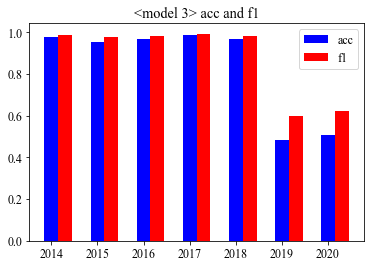

In [40]:
if not os.path.isdir('./visual'):
    os.mkdir('./visual')

x = np.arange(len(years))
plt.bar(x , score_list3, label="acc", width=0.3, color='b')
plt.bar(x+0.3 , f1_list3, label="f1", width=0.3, color='r')

# for i, year in enumerate(years[2:]):
    
    
plt.xticks(x, years)


plt.title('<model 3> acc and f1')
plt.legend()
plt.savefig(f"./visual/model3_acc_f1.png")
plt.show()

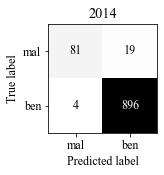

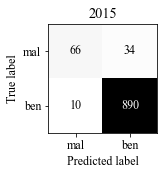

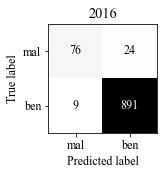

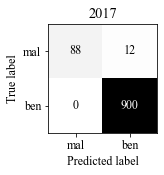

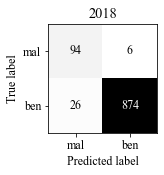

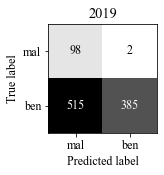

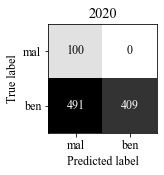

In [41]:
font = {'family' : 'Times New Roman',
    'weight' : 'bold',
    'size'   : 12}
plt.rc('font', **font)


for i, cm in enumerate(confusion_list3):
    disp = ConfusionMatrixDisplay(cm, display_labels=['mal','ben'])
    fig,ax=plt.subplots(figsize=(2,2))
    disp.plot(cmap='Greys', colorbar=False, ax=ax)
    plt.title(f'{years[i]}')
    plt.savefig(f"./visual/model3_Confusion_matrix_{years[i]}.png" ,bbox_inches='tight', dpi=500)

# 점진적 학습 2

In [32]:
100//7

14

In [33]:
model4=RandomForestClassifier(random_state=42, warm_start=True)
model4.n_estimators = 100//7+2
for i in range(len(train_ben_df_list)):
    train_df_per = pd.concat([train_ben_df_list[i], train_mal_df_list[i]])
    model4.fit(train_df_per, train_label_per)
    model4.n_estimators += 100//7

In [34]:
score_list4=[]
f1_list4=[]
confusion_list4=[]
for i, year in enumerate(years):
    ben_df = ben_df_dict[year].iloc[-900:,1:]
    mal_df = mal_df_dict[year].iloc[-100:,1:]
    test_df = pd.concat([ben_df, mal_df])
    test_label = len(ben_df)*[1]+ len(mal_df)*[0]
    score_list4.append(model4.score(test_df, test_label))
    y_pred = model4.predict(test_df)
    f1_list4.append(f1_score(test_label, y_pred))
    confusion_list4.append(confusion_matrix(test_label, y_pred))

In [35]:
df=pd.DataFrame([list(map(str, years)), score_list4, f1_list4]).T
df.columns=['year','accuracy','f1 score']
df

,year,accuracy,f1 score
0,2014,0.977,0.987328
1,2015,0.966,0.981257
2,2016,0.974,0.985619
3,2017,0.992,0.995575
4,2018,0.967,0.981471
5,2019,0.508,0.624427
6,2020,0.542,0.658718


In [36]:
AUT(score_list4), mean(score_list4)

(0.8610833333333333, 0.8465714285714284)

In [37]:
AUT(f1_list4), mean(f1_list4)

(0.8985622038269674, 0.8877709000331819)

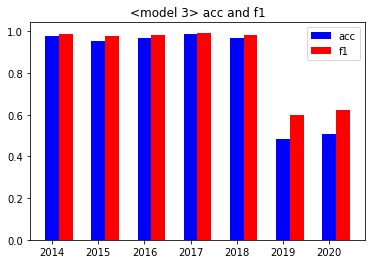

In [38]:
if not os.path.isdir('./visual'):
    os.mkdir('./visual')

x = np.arange(len(years))
plt.bar(x , score_list3, label="acc", width=0.3, color='b')
plt.bar(x+0.3 , f1_list3, label="f1", width=0.3, color='r')

# for i, year in enumerate(years[2:]):
    
    
plt.xticks(x, years)


plt.title('<model 3> acc and f1')
plt.legend()
plt.savefig(f"./visual/model3_acc_f1.png")
plt.show()

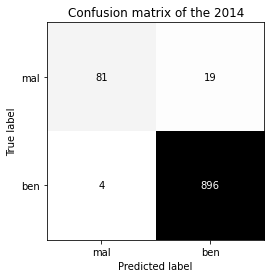

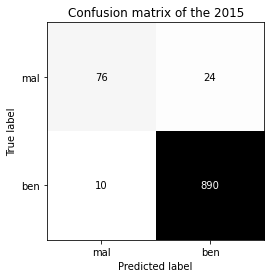

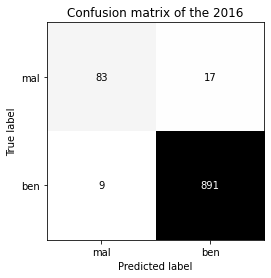

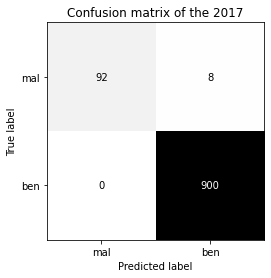

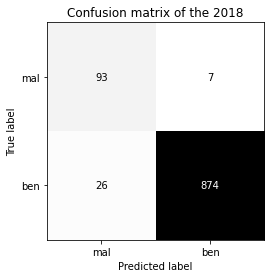

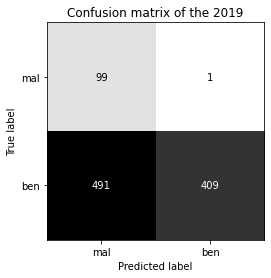

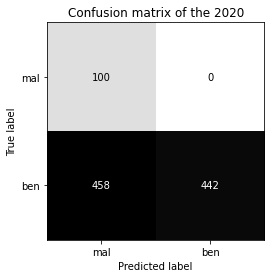

In [79]:
for i, cm in enumerate(confusion_list4):
    disp = ConfusionMatrixDisplay(cm, display_labels=['mal','ben'])
    disp.plot(cmap='Greys', colorbar=False)
    plt.title(f'Confusion matrix of the {years[i]}')

# 결과

In [80]:
score_list = [
0.9933,
0.9933,
0.9896,
0.9625,
0.9643,
0.302,
0.2466
]

In [81]:
f1_list=[
0.9963,
0.9963,
0.9942,
0.9796,
0.9802,
0.373,
0.287
]

In [82]:
AUT(score_list), AUT(f1_list)

(0.805275, 0.8274916666666666)

In [43]:
AUT(score_list), AUT(f1_list)

(0.7676700000000001, 0.7937299999999999)

In [44]:
AUT(score_list1), AUT(f1_list1)

(0.9775833333333334, 0.9873816893319404)

In [45]:
AUT(score_list3), mean(score_list3)

(0.8508333333333334, 0.8354285714285714)

In [46]:
AUT(score_list4), mean(score_list4)

(0.8610833333333333, 0.8465714285714284)

In [47]:
AUT(f1_list1), mean(f1_list1)

(0.9873816893319404, 0.9870521414455092)

In [48]:
AUT(f1_list2), mean(f1_list2)

(0.9655151425097358, 0.9660669178928664)

In [49]:
AUT(f1_list3), mean(f1_list3)

(0.8895836823199187, 0.8776597513419951)

In [50]:
AUT(f1_list4), mean(f1_list4)

(0.8985622038269674, 0.8877709000331819)

In [51]:
AUT(score_list2), AUT(f1_list2)

(0.93575, 0.9655151425097358)

In [52]:
AUT(score_list3), AUT(f1_list3)

(0.8508333333333334, 0.8895836823199187)

In [53]:
AUT(score_list), AUT(f1_list)

(0.7676700000000001, 0.7937299999999999)

In [54]:
AUT(score_list1), AUT(f1_list1)

(0.9775833333333334, 0.9873816893319404)

In [55]:
AUT(score_list2), AUT(f1_list2)

(0.93575, 0.9655151425097358)

In [56]:
AUT(score_list3), AUT(f1_list3)

(0.8508333333333334, 0.8895836823199187)